# Generators

In [1]:
from pycomplexnet import generators, network
import itertools
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Random graphs

A random graph can be created as follows.

In [2]:
RANDOM_NET_N_NODES = 100
net = generators.random_network(RANDOM_NET_N_NODES,0.1)

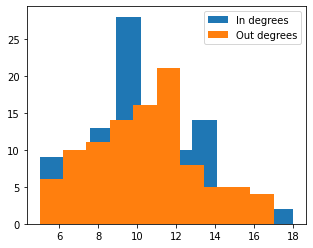

In [3]:
plt.rcParams['figure.figsize'] = (5,4)
plt.hist(net.get_in_degrees().tolist()[0], label='In degrees')
plt.hist(net.get_out_degrees().tolist()[0], label='Out degrees')
plt.legend();

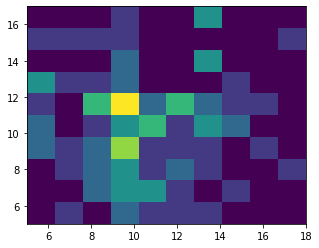

In [4]:
plt.rcParams['figure.figsize'] = (5,4)
plt.hist2d(x=net.get_in_degrees().tolist()[0], y=net.get_out_degrees().tolist()[0]);

We can also visualise the network using `NetworkX`, but take into account the limitations of visualising large complex graphs.

In [5]:
net.adjacency_matrix.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

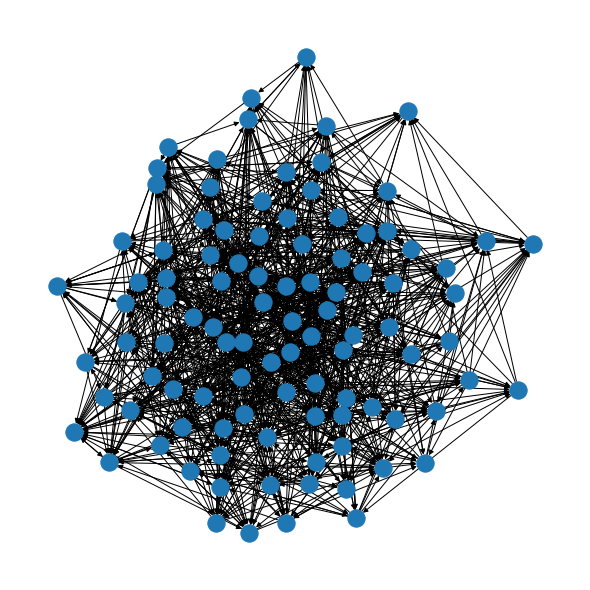

In [6]:
plt.rcParams['figure.figsize'] = (8,8)
G = nx.from_scipy_sparse_matrix(net.adjacency_matrix, create_using=nx.DiGraph)

# Plot it
nx.draw(G, with_labels=False)
plt.show()

And see how the distribution of distances resembles the shape of an exponential distribution.

In [7]:
plt.rcParams['figure.figsize'] = (5,4)
min_distances = [
    net.get_distance(i,j) for (i,j) in itertools.product(range(0,RANDOM_NET_N_NODES),range(0,RANDOM_NET_N_NODES))
]

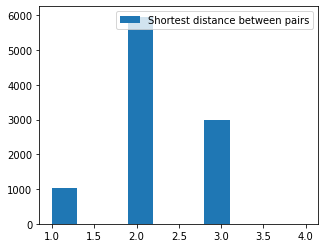

In [8]:
plt.hist([d for d in min_distances if d is not np.Inf], label='Shortest distance between pairs')
plt.legend();

## Star network

A star network is created with a symmetric adjacency matrix, so we can deal with it as non directed.

In [9]:
N_NODES = 100
star_net = generators.star_network(N_NODES,1)

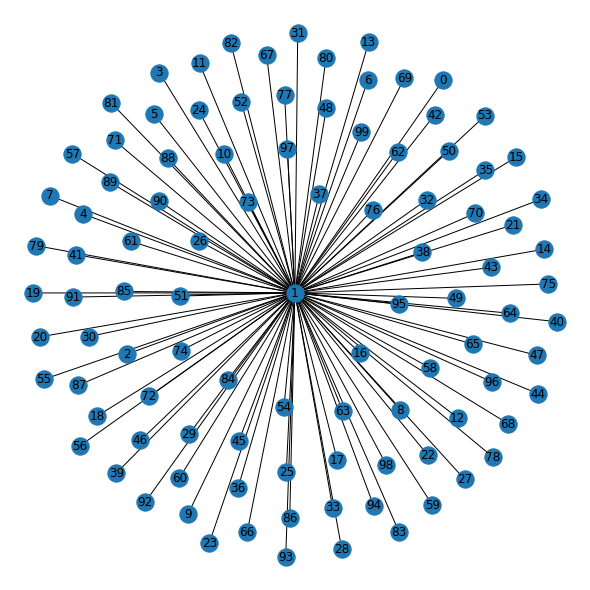

In [10]:
plt.rcParams['figure.figsize'] = (8,8)
G = nx.from_scipy_sparse_matrix(star_net.adjacency_matrix)

# Plot it
nx.draw(G, with_labels=True)
plt.show()

We can see that all nodes but one have degree 1, and the center node has degree equal to the number of nodes minus one.

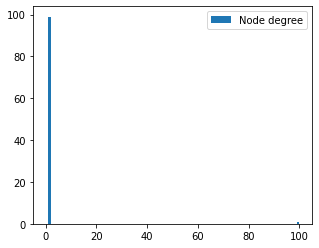

In [11]:
plt.rcParams['figure.figsize'] = (5,4)

plt.hist(star_net.get_in_degrees().tolist()[0], bins=range(0,N_NODES+1), label='Node degree')
plt.legend();

We can also check that the distance between ny pair of nodes not including the center is 2.

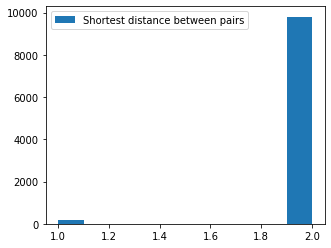

In [12]:
plt.rcParams['figure.figsize'] = (5,4)
distances_to_center = [
    star_net.get_distance(i,j) for (i,j) in itertools.product(range(0,N_NODES),range(0,N_NODES))
]
plt.hist(distances_to_center, label='Shortest distance between pairs')
plt.legend();